 # MEERAN SIDDIQUI PROJECT 2
 net id- mxs220072

## Summary

Project 2 is to facilitate students practice of the following Data Science concepts:
- Train and tune classification model
- Perform feature engineering to improve model performance
- Explain/interpret and debug model


## Tasks

The project will include following tasks:
- Load dataset. Don't use "index" column for training.
- Clean up the data:
    - Encode replace missing values
    - Replace features values that appear incorrect
    - Encode numerical variables that come as strings, for example string `$100.01` should be converted to numerical value
- Encode categorical variables
- Split dataset to Train/Test/Validation. If you perform cross-validation while tuning hyper-parameters, you don't need validation dataset.
- Add engineered features. Simple encoding (Target encoding) for individual feature doesn't count to the 10 required engineered features
- Train and tune ML models
- Provide final metrics using Test (hold-out) dataset:
    - Classification: AUC
    - Confusion matrix for best F1
- Interpret final trained model using Test dataset:
    - Global feature importance using both Shapley values and permutation feature importance
    - Summary plot with Shapley values 
    - Individual observations analysis using Shapley values. Two records for each of the scenarios with significant probability:
        - Label `0` is correctly identified
        - Label `0` is identified as `1`
        - Label `1` is correctly identified
        - Label `1` is identified as `0`
        - Significant probability means high probability of being correct/in-correct (depending on the scenario)

## Datasets

You are provided with the  dataset on eLearning. 
There were several changes made to the dataset: columns dropped/added. 

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.  
More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied



**Don't use original datasets, use only dataset provided with project requirements in eLearning**

## Deliverables in a single zip file in the following structure:
- `notebook` (folder)
    - Jupyter notebook with complete code to manipulate data, train and tune final model. `ipynb` format
    - Jupyter notebook in `html` format
- `artifacts` (folder)
    - Model and any potential encoders in the "pkl" format or native H2O-3 format (for H2O-3 model)
    - Scoring function that will load the final model and encoders. Separate from above notebook or `.py` file

**Additional requirements:**
- Each cell in the notebook should have been run
- Use markdown to annotate and explain your code
- Use visualizations for ML explainability part


Your notebook should include explanations about your code and be designed to be easily followed. All results should be reproducible. Every cell with code should be run.

Once you are done with final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: you might want to first produce working code using small subset of the dataset to speed up debugging process.

## Models

You will need to train and tune two types of models:
- GBM (H2O)
- LightGBM. To install LightGBM, run following command from your terminal after activating class virtual environment:  `pip install lightgbm==3.3.5` 


You will train and tune 2 models for each task for the total of 2 final models. 


First, split he dataset to Train/Validation/Test, before applying any encodings clean-up or feature engineering. 
It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


### Categorical variables encoding

Encode categorical variables using either one of the techniques below. Don't use LabelEncoder.
- One-hot-encoder for variables with less than 10 valid values. Name your new columns "Original_name"_valid_value
- (If using sklearn) Target encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_trg
- (If using H2O) Use H2O target encoder


Example of use for target encoder:
```
import category_encoders as ce

encoder = ce.TargetEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

### Feature engineering

You should train/fit categorical features encoders on Train only. Use `transform` or equivalent function on Validation/Test datasets.

It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


You should generate various new features. Examples of such features can be seen in the Module-3 lecture on GLMs.
Your final model should have at least **10** new engineered features. One-hot-encoding, label encoding, and target encoding is not included in the **10** features.

Ideas for Feature engineering for various types of variables:
1. https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/transformations.html
2. GLM lecture and hands-on (Module-3)

### Model Tuning

Perform hyper parameter tuning for both models.
- Hyper-parameter tuning. Your hyper-parameter search space should have at least 150 combinations or 150 Optuna trials.
- To avoid over-fitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training. Not needed if you perform cross-validation.
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. You should add at least two engineered features.  For example, add feature which is combination of two features.
- Calculate probability threshold to maximize F1.

It should be clearly stated what parameters were selected after hyper parameters tuning. If using early stopping, make sure final model is trained with proper parameters that include number of iterations.

To simplify scoring, train single model on provided full dataset with parameters and features found in the Tuning stage.

## Scoring Function

You only need to submit single scoring function for either GBM or LightGBM model.
The scoring function will perform the following activities:
- Accept dataset in the same format as provided with the project, minus "target" column
- Load trained model and any encoders that are needed to transform data
- Transform dataset into format that can be scored with the trained model
- Score the dataset and return the results, for each record in a similar way as in Project 1:
    - Record label as determined by final model
    - You need to assign label based on maximum F1 threshold
    - Probability 

```
index	label	probability_0	probability_1
1	      0	        0.901298	0.098702
2	      1	        0.071879	0.928121
3	      1	        0.367665	0.632335
4	      1	        0.098564	0.901436
5	      0	        0.923460	0.076540
```

See Project 1 for more details on scoring function and working example.

### Threshold calculation

You will need to calculate optimal threshold for class assignment using F1 metric:
- If using sklearn, use F1 `macro`: `f1_score(y_true, y_pred, average='macro')` 
- If using H2O-3, use F1

You will need to find optimal probability threshold for class assignment, the threshold that maximizes above F1.


### Model interpretation

You should provide detailed write-up on what features are important for the model predictions. Your write-up should be written in "english" and in the way business manager can understand how the model works.
At the minimum include:
- Shapley summary graph: `shap.plots.beeswarm` 
- Shapley feature interaction graphs: `shap.plots.scatter` 
- Multiple examples of single records Shapley graphs with explanations. 
- Strong/Weak points of the model
- Are there any scenarios (particular input data) that will require over-write model prediction? 

Resources: https://github.com/slundberg/shap


### Model performance in H2O Driverless AI (performance to aim for)

I run experiments in DAI without any data manipulation. It means that potential improvement in performance can be gained after data is cleaned. 
AUC on cross-validation dataset: 0.8515
AUC on hold-out (not provided, will be evaluated on during grading): 0.855

Three top features:
- CVTE:Bank:BankState:FranchiseCode:SBA_Appv.0
- CVTE:Bank:BankState:NAICS:UrbanRural.0
- WoE:Bank:BankState:NAICS.0


CVTE: cross-validated target encoding
WoE : weight of evidence 

## Save all artifacts

Save all artifacts needed for scoring function:
- Trained model
- Encoders

You should restart your Kernel to properly test scoring function

## Model Scoring

Use example scoring function from Project 1 as the reference. 


## Load Data example

In [1]:
import pandas as pd
data = pd.read_csv('E:\machine_learning\data\SBA_loans_project_2.zip')



In [2]:
data.head()

index           City State    Zip                      Bank BankState  \
0      0      PRINCETON    MN  55371  PEOPLES BANK OF COMMERCE        MN   
1      1    Kansas city    MO  64116              BANK OF HAYS        KS   
2      2       BELLWOOD    PA  16617   FIRST COMMONWEALTH BANK        PA   
3      3  GRAND PRAIRIE    TX  75050           PROSPERITY BANK        TX   
4      4        EL PASO    TX  79925             WESTSTAR BANK        TX   

    NAICS  NoEmp  NewExist  CreateJob  ...  FranchiseCode  UrbanRural  \
0  441120      4       2.0          0  ...              1           0   
1  481111     14       1.0          0  ...              0           1   
2  334417     10       1.0          0  ...              1           1   
3       0     18       1.0          0  ...              1           0   
4  423220      4       1.0          0  ...              0           1   

   RevLineCr LowDoc DisbursementGross BalanceGross        GrAppv  \
0          N      N      $114,577.00        $0.00   $114,577.00    
1          N      N       $25,000.00        $0.00    $25,000.00    
2          0      N       $85,000.00        $0.00    $85,000.00    
3          N      N      $230,000.00        $0.00   $230,000.00    
4          N      N       $32,000.00        $0.00    $32,000.00    

       SBA_Appv LoanInd  MIS_Status  
0   $85,933.00        1           0  
1   $12,500.00        7           0  
2   $42,500.00        4           0  
3  $195,500.00        5           0  
4   $16,000.00        9           0  

[5 rows x 21 columns]

In [3]:
data.columns

Index(['index', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'LoanInd', 'MIS_Status'],
      dtype='object')

In [4]:
data['MIS_Status'].value_counts(normalize=True) * 100


0    82.438293
1    17.561707
Name: MIS_Status, dtype: float64

In [5]:
data=data.drop(['index'], axis=1)
print("Data shape:", data.shape)

Data shape: (807450, 20)


In [6]:
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

# Data Cleaning

The code checks for missing values and fills them with zero or "Missing" based on the data type. It then formats certain columns' data types and drops any rows with invalid data. Finally, the code changes the "NewExist" column values to either 1 or 0. This data cleaning process ensures a consistent and clean dataset for analysis.


In [7]:
values_to_fill = {}

for col in data.columns:
    if data[col].isna().any():
        print(f"column {col} {data[col].dtype}")
        if pd.api.types.is_numeric_dtype(data[col].dtype):
            values_to_fill[col] = 0
        else:
            values_to_fill[col] = "Missing"

data.fillna(value=values_to_fill, inplace=True)



column City object
column State object
column Bank object
column BankState object
column NewExist float64
column RevLineCr object
column LowDoc object


In [8]:
columns = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']

for column in columns:
    data[column] = data[column].replace({'\$': '', ',': ''}, regex=True).astype('float64')


In [9]:
data['RevLineCr'].value_counts()

N          377572
0          231637
Y          180374
T           13720
Missing      4090
1              19
R              13
`              10
2               5
,               1
7               1
4               1
A               1
C               1
Q               1
-               1
.               1
5               1
3               1
Name: RevLineCr, dtype: int64

In [10]:
index_drop_RevLineCr = data[~data['RevLineCr'].isin(['N', 'Y', '0', 'T'])].index
data.drop(index_drop_RevLineCr, inplace=True)


In [11]:
def change_franchise(x):
    if (x == 1) | (x == 0):
        return 0
    else :
        return 1

data['FranchiseCode'] = data['FranchiseCode'].apply(lambda x: change_franchise(x))

In [12]:
data.dtypes

City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementGross    float64
BalanceGross         float64
GrAppv               float64
SBA_Appv             float64
LoanInd                int64
MIS_Status             int64
dtype: object

In [13]:
data.isnull().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
LoanInd              0
MIS_Status           0
dtype: int64

In [14]:
# Drop rows where NewExist = 0
index_exist0 = data[data['NewExist'] == 0].index
data.drop(index_exist0, inplace=True)

# Replace NewExist values
data['NewExist'] = data['NewExist'].apply(lambda x: 1 if x == 1 else 0)


In [15]:
data['LowDoc'].value_counts()

N          699967
Y           97166
Missing      2288
0            1104
C             676
S             541
A             444
R              66
1               1
Name: LowDoc, dtype: int64

In [16]:
#dropping values other than Y or N 
index_drop_lowdoc = []
for index in list(data[(data['LowDoc'] != 'N') & (data['LowDoc'] != 'Y')].index):
    index_drop_lowdoc.append(index)

data.drop(index_drop_lowdoc,inplace=True)

In [17]:
data.head()

City State    Zip                      Bank BankState   NAICS  \
0      PRINCETON    MN  55371  PEOPLES BANK OF COMMERCE        MN  441120   
1    Kansas city    MO  64116              BANK OF HAYS        KS  481111   
2       BELLWOOD    PA  16617   FIRST COMMONWEALTH BANK        PA  334417   
3  GRAND PRAIRIE    TX  75050           PROSPERITY BANK        TX       0   
4        EL PASO    TX  79925             WESTSTAR BANK        TX  423220   

   NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
0      4         0          0            0              0           0   
1     14         1          0           14              0           1   
2     10         1          0            2              0           1   
3     18         1          0            0              0           0   
4      4         1          0            4              0           1   

  RevLineCr LowDoc  DisbursementGross  BalanceGross    GrAppv  SBA_Appv  \
0         N      N           114577.0           0.0  114577.0   85933.0   
1         N      N            25000.0           0.0   25000.0   12500.0   
2         0      N            85000.0           0.0   85000.0   42500.0   
3         N      N           230000.0           0.0  230000.0  195500.0   
4         N      N            32000.0           0.0   32000.0   16000.0   

   LoanInd  MIS_Status  
0        1           0  
1        7           0  
2        4           0  
3        5           0  
4        9           0

In [18]:
from sklearn.model_selection import train_test_split
train_sba, test_sba = train_test_split(data, test_size=0.3, random_state=42)





In [19]:
X_train = train_sba.drop(columns='MIS_Status')
y_train = train_sba['MIS_Status']
X_test = test_sba.drop(columns='MIS_Status')
y_test = test_sba['MIS_Status']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((557993, 19), (557993,), (239140, 19), (239140,))

# Adding Engineered features to train dataset.

This code creates new features based on existing columns in the dataset. The new features provide additional information about the loans, such as whether the bank and customer are in the same state, differences between loan amounts, and ratios of loan amounts to other variables. These new features help us gain insight into the relationships between the variables and improve our ability to make predictions and inform business decisions.

In [20]:
import numpy as np

# whether the bank and customer are in the same state
X_train['state_and_bankstate'] = np.where(X_train['State'] == X_train['BankState'], 1, 0)

# The difference between initial approved amount and final amount of loan
X_train['diff_loan_amt1'] = X_train['GrAppv'] - X_train['SBA_Appv']

# The difference between approved amount of loan and the requested amount of loan
X_train['diff_loan_amt2'] = X_train['DisbursementGross'] - X_train['SBA_Appv']

# amount of installment
X_train['total_job'] = X_train['CreateJob'] * X_train['RetainedJob']

#The ratio of the gross amount of loan approved by the bank (GrAppv) to the requested amount of loan (DisbursementGross).
X_train['loan_approval_rate'] = X_train['GrAppv'] / X_train['DisbursementGross']

#The ratio of the number of business employees (NoEmp) to the gross amount of the loan approved by the bank (GrAppv).
X_train['employees_per_loan_amount'] = X_train['NoEmp'] / X_train['GrAppv']

#The ratio of the loan amount approved by the SBA (SBA_Appv) to the requested amount of loan (DisbursementGross).
X_train['sba_approval_rate'] = X_train['SBA_Appv'] / X_train['DisbursementGross']

#indicates whether the business is a franchise or not based on the FranchiseCode column
X_train['franchise_or_not'] = np.where(X_train['FranchiseCode'] <= 1, 0, 1)

# the ratio of the gross amount of the loan approved by the bank (GrAppv) to the number of business employees (NoEmp)
X_train['loan_amount_per_employee'] = X_train['GrAppv'] / X_train['NoEmp']

#the ratio of the outstanding balance (BalanceGross) to the gross amount of the loan approved by the bank (GrAppv).
X_train['loan_balance_ratio'] = X_train['BalanceGross'] / X_train['GrAppv']


1.state_and_bankstate: Indicates whether the bank and borrower are in the same state.

2.diff_loan_amt1: The difference between initial approved amount and final amount of loan.

3.diff_loan_amt2: The difference between approved amount of loan and the requested amount of loan.

4.total_job: The total number of jobs created and retained.

5.loan_approval_rate: The ratio of the gross amount of loan approved by the bank to the requested amount of loan.

6.employees_per_loan_amount: The ratio of the number of business employees to the gross amount of the loan approved by the bank.

7.sba_approval_rate: The ratio of the loan amount approved by the SBA (SBA_Appv) to the requested amount of loan (DisbursementGross).

8.franchise_or_not-Indicates whether the business is a franchise or not based on the FranchiseCode column

9.loan_amount_per_employee: The ratio of the gross amount of the loan approved by the bank to the number of business employees.

10.loan_balance_ratio: The ratio of the outstanding balance to the gross amount of the loan approved by the bank.

In [21]:
X_train.head()

City State    Zip                            Bank  \
40328       SAINT LOUIS    MO  63141  U.S. BANK NATIONAL ASSOCIATION   
10471           WAKONDA    SD  57073      FIRST DAKOTA NATIONAL BANK   
805497        COVINGTON    GA  30016                       BBCN BANK   
265303  CRESTVIEW HILLS    KY  41017  JPMORGAN CHASE BANK NATL ASSOC   
670318          MISSION    KS  66205  U.S. BANK NATIONAL ASSOCIATION   

       BankState   NAICS  NoEmp  NewExist  CreateJob  RetainedJob  ...  \
40328         OH  339999      2         1          1            3  ...   
10471         SD  561720      0         0          2            0  ...   
805497        CA  541430      3         1          1            4  ...   
265303        IL       0     30         1          0           30  ...   
670318        OH  448190     10         1          0           10  ...   

        state_and_bankstate  diff_loan_amt1 diff_loan_amt2 total_job  \
40328                     0          5000.0        14343.0         3   
10471                     1         22500.0        22500.0         0   
805497                    0          2250.0         2250.0         4   
265303                    0         43050.0        43050.0         0   
670318                    0         22500.0        93959.0         0   

        loan_approval_rate  employees_per_loan_amount  sba_approval_rate  \
40328             0.516983                   0.000200           0.258491   
10471             1.000000                   0.000000           0.500000   
805497            1.000000                   0.000200           0.850000   
265303            1.000000                   0.000174           0.750000   
670318            0.386402                   0.000222           0.193201   

        franchise_or_not  loan_amount_per_employee  loan_balance_ratio  
40328                  0                    5000.0                 0.0  
10471                  0                       inf                 0.0  
805497                 0                    5000.0                 0.0  
265303                 0                    5740.0                 0.0  
670318                 0                    4500.0                 0.0  

[5 rows x 29 columns]

# Adding Engineered features to test dataset

In [22]:
import numpy as np

# whether the bank and customer are in the same state
X_test['state_and_bankstate'] = np.where(X_test['State'] == X_test['BankState'], 1, 0)

# The difference between initial approved amount and final amount of loan
X_test['diff_loan_amt1'] = X_test['GrAppv'] - X_test['SBA_Appv']

# The difference between approved amount of loan and the requested amount of loan
X_test['diff_loan_amt2'] = X_test['DisbursementGross'] - X_test['SBA_Appv']

# amount of installment
X_test['total_job'] = X_test['CreateJob'] * X_test['RetainedJob']

#The ratio of the gross amount of loan approved by the bank (GrAppv) to the requested amount of loan (DisbursementGross).
X_test['loan_approval_rate'] = X_test['GrAppv'] / X_test['DisbursementGross']

#The ratio of the number of business employees (NoEmp) to the gross amount of the loan approved by the bank (GrAppv).
X_test['employees_per_loan_amount'] = X_test['NoEmp'] / X_test['GrAppv']

#The ratio of the loan amount approved by the SBA (SBA_Appv) to the requested amount of loan (DisbursementGross).
X_test['sba_approval_rate'] = X_test['SBA_Appv'] / X_test['DisbursementGross']

#indicates whether the business is a franchise or not based on the FranchiseCode column
X_test['franchise_or_not'] = np.where(X_test['FranchiseCode'] <= 1, 0, 1)

# the ratio of the gross amount of the loan approved by the bank (GrAppv) to the number of business employees (NoEmp)
X_test['loan_amount_per_employee'] = X_test['GrAppv'] / X_test['NoEmp']

#the ratio of the outstanding balance (BalanceGross) to the gross amount of the loan approved by the bank (GrAppv).
X_test['loan_balance_ratio'] = X_test['BalanceGross'] / X_test['GrAppv']

In [23]:
X_test.head()

City State    Zip                            Bank BankState  \
593636      SANTA ANA    CA   2701  BANK OF AMERICA CALIFORNIA N.A        CA   
33416      CARBONDALE    PA  18407  FIRST LIB BK & TRUST A DIVISIO        PA   
127593      SALISBURY    MD  21801   SUPERIOR FINANCIAL GROUP, LLC        CA   
356843         Agawam    MA   1001   TD BANK, NATIONAL ASSOCIATION        DE   
663620  COEUR D'ALENE    ID  83814     WELLS FARGO BANK NATL ASSOC        SD   

         NAICS  NoEmp  NewExist  CreateJob  RetainedJob  ...  \
593636  812320      2         1          0            0  ...   
33416        0      5         1          0            0  ...   
127593  484110      1         1          0            1  ...   
356843  713990      1         0          3            4  ...   
663620       0     11         1          0            0  ...   

        state_and_bankstate  diff_loan_amt1 diff_loan_amt2 total_job  \
593636                    1         37250.0        37250.0         0   
33416                     1          7000.0         7000.0         0   
127593                    0          1125.0         1125.0         0   
356843                    0         17500.0       111390.0        12   
663620                    0          3500.0         3500.0         0   

        loan_approval_rate  employees_per_loan_amount  sba_approval_rate  \
593636            1.000000                   0.000013           0.750000   
33416             1.000000                   0.000071           0.900000   
127593            1.000000                   0.000133           0.850000   
356843            0.271549                   0.000029           0.135775   
663620            1.000000                   0.000314           0.900000   

        franchise_or_not  loan_amount_per_employee  loan_balance_ratio  
593636                 0              74500.000000                 0.0  
33416                  0              14000.000000                 0.0  
127593                 0               7500.000000                 0.0  
356843                 0              35000.000000                 0.0  
663620                 0               3181.818182                 0.0  

[5 rows x 29 columns]

# Encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
import joblib
import dill

#Columns to drop from ML models
cols_to_drop = []
#Categorical encoders disctionary
cat_encoders = {}
#New categorical (encoded) columns
cat_enc_columns = []

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        if X_train[col].nunique() < 10:
            print("One-hot encoding of ", col)
            enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
            enc.fit(X_train[[col]])
            joblib.dump(enc, col + '_enc.joblib')
            result_train = pd.DataFrame(enc.transform(X_train[[col]]),
                                        columns=[col + "_" + str(x) for x in enc.categories_[0]],
                                        index=X_train.index)
            X_train = pd.concat([X_train, result_train], axis=1, join='inner')
            result_test = pd.DataFrame(enc.transform(X_test[[col]]),
                                       columns=[col + "_" + str(x) for x in enc.categories_[0]],
                                       index=X_test.index)
            X_test = pd.concat([X_test, result_test], axis=1, join='inner')
            cat_encoders[col] = [enc, "ohe"]
            cat_enc_columns += result_train.columns.tolist()
        else:
            print("Target Encoding of ", col)
            enc = TargetEncoder()
            enc.fit(X_train[col], y=y_train, handle_unknown='value')
            dill.dump(enc, open(col+'_trg_'+'pre_processing.pkl', "wb"))
            new_col_name = col+"_trg"
            X_train[new_col_name] = enc.transform(X_train[[col]])
            X_test[new_col_name] = enc.transform(X_test[[col]])
            cat_encoders[col] = [enc, "trg"]
            cat_enc_columns.append(new_col_name)

        cols_to_drop.append(col)

X_train.drop(cols_to_drop, axis=1, inplace=True)

X_test.drop(cols_to_drop, axis=1, inplace=True)

Target Encoding of  City
Target Encoding of  State
Target Encoding of  Bank
Target Encoding of  BankState
One-hot encoding of  RevLineCr


c:\users\asus\virtualenv\ml-spring-2023\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


One-hot encoding of  LowDoc


c:\users\asus\virtualenv\ml-spring-2023\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Training and Tuning.

The below code using Optuna to tune hyperparameters for a LightGBM binary classification model. The objective is to maximize the AUC score. The code defines an objective function that creates a dictionary of hyperparameters and trains a LightGBM model with 5-fold cross-validation. The Optuna study is set up to maximize the objective function, and the best set of hyperparameters and corresponding AUC score are printed. The code trains a LightGBM model using the best hyperparameters and computes the AUC score on both the training and test datasets.

In [25]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [26]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

params = {"verbose": -1}
lgb_classifier = lgb.train(params=params, train_set=train_data)


In [27]:
from sklearn.metrics import roc_auc_score

test_auc = roc_auc_score(y_test, lgb_classifier.predict(X_test))
train_auc = roc_auc_score(y_train, lgb_classifier.predict(X_train))

print(f"Test AUC Score: {test_auc:.4f}")
print(f"Train AUC Score: {train_auc:.4f}")


Test AUC Score: 0.8100
Train AUC Score: 0.8408


In [28]:
import optuna

c:\users\asus\virtualenv\ml-spring-2023\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
from optuna.integration import LightGBMPruningCallback
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import optuna
import tqdm as notebook_tqdm
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
study_model_iteractions = {}

def objective(trial, X, y):
    param_grid = {
        "num_iterations": 10000,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05),
        "num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
        "max_depth": trial.suggest_int("max_depth", 5, 20, step=2),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
        "is_unbalance": trial.suggest_categorical("is_unbalance",[True, False]),
        "verbose": -1,
        "objective":"binary",
        "metric":"auc"
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = []
    cv_iterations = []
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

        train_data = lgb.Dataset(X_train, label=y_train)
        valid_data = lgb.Dataset(X_valid, label=y_valid)
        
        callbacks = [LightGBMPruningCallback(trial, "auc"), lgb.early_stopping(stopping_rounds=5)]
        lgb_clf = lgb.train(param_grid, train_set=train_data, valid_sets=[valid_data], callbacks=callbacks)
        
        preds = lgb_clf.predict(X_valid)
        cv_scores.append(roc_auc_score(y_valid, preds))
        cv_iterations.append(lgb_clf.best_iteration)
    
    study_model_iteractions[trial.number] = np.mean(cv_iterations)
    
    return np.mean(cv_scores)


The below code will use Optuna study to automatically find the best hyperparameters for a LightGBM binary classification model. The study runs 150 trials using the objective function that maximizes the AUC score.

In [30]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=150)

[I 2023-05-08 02:21:55,589] A new study created in memory with name: LGBM Classifier
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[177]	valid_0's auc: 0.853096
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.851156
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[143]	valid_0's auc: 0.850365
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.850492
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.84933


[I 2023-05-08 02:22:29,569] Trial 0 finished with value: 0.8508876633846828 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 55, 'max_depth': 11, 'min_data_in_leaf': 600, 'lambda_l1': 5.533899739375384, 'lambda_l2': 0.0005047617540532957, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8508876633846828.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.t

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[206]	valid_0's auc: 0.852794
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[221]	valid_0's auc: 0.851574
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[218]	valid_0's auc: 0.850533
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[153]	valid_0's auc: 0.850711
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[177]	valid_0's auc: 0.850982


[I 2023-05-08 02:23:10,860] Trial 1 finished with value: 0.8513189744046155 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 50, 'max_depth': 15, 'min_data_in_leaf': 300, 'lambda_l1': 4.1190228758350587e-07, 'lambda_l2': 1.794692189553184e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 1 with value: 0.8513189744046155.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~op

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.816287
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.813783
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.813916
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1237]	valid_0's auc: 0.850434
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.814728


[I 2023-05-08 02:24:27,102] Trial 2 finished with value: 0.8218294844386629 and parameters: {'learning_rate': 0.01, 'num_leaves': 105, 'max_depth': 11, 'min_data_in_leaf': 400, 'lambda_l1': 2.0711530033032386e-07, 'lambda_l2': 0.037102678462879804, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 1 with value: 0.8513189744046155.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Tria

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[101]	valid_0's auc: 0.851808
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.85234
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[156]	valid_0's auc: 0.851409
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.852003
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[101]	valid_0's auc: 0.850687


[I 2023-05-08 02:25:06,070] Trial 3 finished with value: 0.8516493324167813 and parameters: {'learning_rate': 0.11, 'num_leaves': 145, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.0001107402943447264, 'lambda_l2': 2.044848798524848e-07, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[792]	valid_0's auc: 0.849703
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[597]	valid_0's auc: 0.846051
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[690]	valid_0's auc: 0.846082
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[780]	valid_0's auc: 0.8483
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[915]	valid_0's auc: 0.849653


[I 2023-05-08 02:27:14,665] Trial 4 finished with value: 0.8479578881997506 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 135, 'max_depth': 5, 'min_data_in_leaf': 900, 'lambda_l1': 1.9157922495469848e-08, 'lambda_l2': 5.2446252397783154e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~

Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[109]	valid_0's auc: 0.852078
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.850647
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.849932
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.85021
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.850084


[I 2023-05-08 02:27:46,469] Trial 6 finished with value: 0.8505900309129066 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 300, 'lambda_l1': 0.23846465752686277, 'lambda_l2': 1.8037597173946083, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.t

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:27:49,226] Trial 9 pruned. Trial was pruned at iteration 4.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.849373
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.847841
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.84907
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.847757
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.84693


[I 2023-05-08 02:28:08,678] Trial 10 finished with value: 0.8481942260590625 and parameters: {'learning_rate': 0.26, 'num_leaves': 120, 'max_depth': 15, 'min_data_in_leaf': 100, 'lambda_l1': 7.65139368585429e-05, 'lambda_l2': 3.01615740948191e-08, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:28:11,799] Trial 13 pruned. Trial was pruned at iteration 11.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.850568
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.850477
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:28:29,507] Trial 14 pruned. Trial was pruned at iteration 134.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:28:30,346] Trial 15 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:28:35,086] Trial 20 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:28:35,931] Trial 21 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/ta

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:28:39,180] Trial 23 pruned. Trial was pruned at iteration 11.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:28:40,121] Trial 24 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.850919
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.849638
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.849702
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.850294
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.849544


[I 2023-05-08 02:29:09,861] Trial 30 finished with value: 0.8500192756909328 and parameters: {'learning_rate': 0.26, 'num_leaves': 95, 'max_depth': 15, 'min_data_in_leaf': 600, 'lambda_l1': 0.009759610662429244, 'lambda_l2': 5.673671348558688e-06, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[107]	valid_0's auc: 0.852221
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.851124
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[101]	valid_0's auc: 0.851218
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.850688
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.850212


[I 2023-05-08 02:29:44,685] Trial 31 finished with value: 0.8510922171026021 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 300, 'lambda_l1': 0.18388767893525362, 'lambda_l2': 1.800642818457221, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.t

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:29:46,033] Trial 32 pruned. Trial was pruned at iteration 3.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:29:47,032] Trial 33 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:29:48,290] Trial 34 pruned. Trial was pruned at iteration 3.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:29:49,087] Trial 35 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featu

Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:29:52,082] Trial 38 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:29:52,915] Trial 39 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/ta

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:29:55,955] Trial 41 pruned. Trial was pruned at iteration 5.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:29:57,214] Trial 42 pruned. Trial was pruned at iteration 5.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:29:58,202] Trial 43 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.850689
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.850628
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.849596
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.850967
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.849523


[I 2023-05-08 02:30:25,684] Trial 44 finished with value: 0.8502807051787655 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 130, 'max_depth': 15, 'min_data_in_leaf': 100, 'lambda_l1': 0.10384604038076314, 'lambda_l2': 0.4272161972507155, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.

Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:30:28,322] Trial 47 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/ta

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.851129
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.850717
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.849835
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.850725
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.849081


[I 2023-05-08 02:30:58,907] Trial 51 finished with value: 0.8502975743988095 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 135, 'max_depth': 15, 'min_data_in_leaf': 100, 'lambda_l1': 0.11771387805788895, 'lambda_l2': 0.31503830426800133, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:31:00,955] Trial 52 pruned. Trial was pruned at iteration 21.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:31:02,266] Trial 53 pruned. Trial was pruned at iteration 7.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:31:03,328] Trial 54 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:31:04,306] Trial 55 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.850901
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.85045
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.850031
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.849733
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.850347


[I 2023-05-08 02:31:26,050] Trial 56 finished with value: 0.8502923683111717 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 13, 'min_data_in_leaf': 100, 'lambda_l1': 0.06289402482051634, 'lambda_l2': 0.14082069289286234, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.850227
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.851626
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.850416
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.850558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.850021


[I 2023-05-08 02:31:53,033] Trial 61 finished with value: 0.8505695316972739 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 13, 'min_data_in_leaf': 100, 'lambda_l1': 0.06250318849419974, 'lambda_l2': 0.11350776102371248, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.850529
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.849933
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.848108
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.849478
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.849776


[I 2023-05-08 02:32:09,560] Trial 62 finished with value: 0.8495648273766765 and parameters: {'learning_rate': 0.26, 'num_leaves': 150, 'max_depth': 13, 'min_data_in_leaf': 100, 'lambda_l1': 0.04173884396908051, 'lambda_l2': 2.3611721707116367, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.852089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.849943
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.850176
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.85159
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.849031


[I 2023-05-08 02:32:32,545] Trial 63 finished with value: 0.85056590334273 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 145, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 0.8779448488156338, 'lambda_l2': 0.41604347904083394, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.tr

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:32:35,596] Trial 64 pruned. Trial was pruned at iteration 43.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:32:36,379] Trial 65 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:32:46,039] Trial 71 pruned. Trial was pruned at iteration 30.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:32:47,240] Trial 72 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.852036
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.851852
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.850776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.851481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.850105


[I 2023-05-08 02:33:19,127] Trial 73 finished with value: 0.8512501246728326 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 0.02528312835278053, 'lambda_l2': 0.1957589433838903, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.852618
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.851901
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.849294
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.850722
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.85014


[I 2023-05-08 02:33:47,952] Trial 74 finished with value: 0.8509349103418747 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.03269545657733562, 'lambda_l2': 0.06644009178434636, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.851634
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.851568
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[99]	valid_0's auc: 0.850199
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.851378
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.849528


[I 2023-05-08 02:34:17,952] Trial 75 finished with value: 0.8508615490836016 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.026431382116198218, 'lambda_l2': 0.08024470609094582, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optun

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[89]	valid_0's auc: 0.852312
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.851944
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.850238
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[107]	valid_0's auc: 0.851935
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.850239


[I 2023-05-08 02:34:50,128] Trial 76 finished with value: 0.851333537373616 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 300, 'lambda_l1': 0.016953770430262128, 'lambda_l2': 0.05969339366058863, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna

Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:34:51,779] Trial 78 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/ta

Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:34:58,084] Trial 85 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/ta

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.850839
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:35:10,535] Trial 92 pruned. Trial was pruned at iteration 72.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.851791
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.85171
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.849699
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.851041
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.850459


[I 2023-05-08 02:35:35,913] Trial 93 finished with value: 0.850940189909491 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 0.06407631466150514, 'lambda_l2': 0.08433172164687308, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:35:37,492] Trial 94 pruned. Trial was pruned at iteration 13.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:35:39,158] Trial 95 pruned. Trial was pruned at iteration 13.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:35:39,997] Trial 96 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:35:45,704] Trial 101 pruned. Trial was pruned at iteration 30.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.851839
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.850394
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.849983
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.849157
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.850294


[I 2023-05-08 02:36:03,026] Trial 102 finished with value: 0.8503333844163272 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 0.049162836837569224, 'lambda_l2': 0.16569154024822472, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optu

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[69]	valid_0's auc: 0.851764
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.850814
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.849378
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.850449
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.848851


[I 2023-05-08 02:36:22,097] Trial 103 finished with value: 0.8502513050941642 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 145, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 0.01549009003775694, 'lambda_l2': 0.0837276161791314, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:36:24,595] Trial 105 pruned. Trial was pruned at iteration 11.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.850428
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.84971
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.849075
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:36:38,159] Trial 106 pruned. Trial was pruned at iteration 60.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:36:38,987] Trial 107 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:36:41,726] Trial 110 pruned. Trial was pruned at iteration 4.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:36:42,578] Trial 111 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.851162
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.851236
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.849658
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.850872
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.850463


[I 2023-05-08 02:37:05,704] Trial 112 finished with value: 0.8506783754579837 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 145, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.6154681960508325, 'lambda_l2': 0.27779128544802845, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna

Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:37:09,911] Trial 116 pruned. Trial was pruned at iteration 11.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:37:10,788] Trial 117 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:37:11,660] Trial 118 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/t

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:37:13,860] Trial 119 pruned. Trial was pruned at iteration 30.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:37:14,673] Trial 120 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.850661
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.850763
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:37:25,064] Trial 121 pruned. Trial was pruned at iteration 64.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[69]	valid_0's auc: 0.852006
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.850755
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.850417
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.850728
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.850343


[I 2023-05-08 02:37:46,087] Trial 122 finished with value: 0.8508499115529036 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 13, 'min_data_in_leaf': 200, 'lambda_l1': 0.8274907917079015, 'lambda_l2': 0.5162691341326977, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.

Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:37:47,962] Trial 124 pruned. Trial was pruned at iteration 5.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:37:49,015] Trial 125 pruned. Trial was pruned at iteration 4.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:37:49,830] Trial 126 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.852374
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.850379
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.85051
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.851006
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.8498


[I 2023-05-08 02:38:13,977] Trial 131 finished with value: 0.8508136622859326 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 145, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 0.9706185391888051, 'lambda_l2': 0.35739027280780994, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna

Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:38:18,210] Trial 136 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.852513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.851409
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.850687
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.849859
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.849269


[I 2023-05-08 02:38:37,661] Trial 137 finished with value: 0.8507472070521122 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 300, 'lambda_l1': 1.6158433317425196, 'lambda_l2': 1.0393413661522585e-06, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~opt

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.850067
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.850403
Training until validation scores don't improve for 5 rounds


[I 2023-05-08 02:38:50,018] Trial 141 pruned. Trial was pruned at iteration 58.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-08 02:38:50,862] Trial 142 pruned. Trial was pruned at iteration 0.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.851141
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.849727
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.849185
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.849254
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.849476


[I 2023-05-08 02:39:06,836] Trial 143 finished with value: 0.8497565851870933 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 145, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 0.0013714470864943662, 'lambda_l2': 0.12098058618861701, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 3 with value: 0.8516493324167813.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2678435746.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~opt

Training until validation scores don't improve for 5 rounds


In [31]:
print(f"\tBest value (AUC): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

print("Best model best_iteration:", study_model_iteractions[study.best_trial.number])

	Best value (AUC): 0.85165
	Best params:
		learning_rate: 0.11
		num_leaves: 145
		max_depth: 19
		min_data_in_leaf: 200
		lambda_l1: 0.0001107402943447264
		lambda_l2: 2.044848798524848e-07
		bagging_fraction: 0.8
		bagging_freq: 5
		feature_fraction: 0.8
		is_unbalance: True
Best model best_iteration: 125.6


In [32]:
dill.dump(study, open("study.p", "wb"))
study = dill.load(open("study.p", "rb"))
best_params = {"verbose": -1,
                "objective":"binary",
                "metric":"auc"
            }

for key,val in study.best_params.items():
    best_params[key] = val


    
best_params["num_iterations"] = int(study_model_iteractions[study.best_trial.number])
best_params

{'verbose': -1,
 'objective': 'binary',
 'metric': 'auc',
 'learning_rate': 0.11,
 'num_leaves': 145,
 'max_depth': 19,
 'min_data_in_leaf': 200,
 'lambda_l1': 0.0001107402943447264,
 'lambda_l2': 2.044848798524848e-07,
 'bagging_fraction': 0.8,
 'bagging_freq': 5,
 'feature_fraction': 0.8,
 'is_unbalance': True,
 'num_iterations': 125}

In [97]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix


# Make predictions on the test data
y_pred = best_lgb.predict(X_test)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary, average='macro')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Print the F1 score and accuracy
print("F1 score:", f1)
print("Accuracy:", accuracy)

#Print the confusion Matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print("Logreg Confusion matrix:\n{}".format(confusion))

F1 score: 0.6781058944837812
Accuracy: 0.7621
Logreg Confusion matrix:
[[31823  9359]
 [ 2536  6282]]


In [33]:
# Create training and test datasets using the optimized parameters
train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1})

# Train the model using the optimized parameters
best_lgb = lgb.train(params=best_params, train_set=train_data)

# Calculate and print the AUC scores on the test and train datasets
test_auc = roc_auc_score(y_test, best_lgb.predict(X_test))
train_auc = roc_auc_score(y_train, best_lgb.predict(X_train))
print(f'Test AUC score: {test_auc:.4f} | Train AUC score: {train_auc:.4f}')


Test AUC score: 0.8203 | Train AUC score: 0.8776


In [91]:
#Find the best F1 and store the best threshold
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# Calculate index for the best probability threshold
best_f1 = 0
best_f1_id = 0
for id, (pr, rc, threshold) in enumerate(zip(precision, recall, thresholds)):
    f1 = 2*(pr*rc)/(pr+rc)
    if f1 > best_f1:
        best_f1 = f1
        best_f1_id = id

print("Best f1:", best_f1)
print("Index of threshold:",best_f1_id)
best_threshold = thresholds[best_f1_id]
print("Threshold for best F1:", best_threshold)

Best f1: 0.5302891933028919
Index of threshold: 39108
Threshold for best F1: 0.6240745941643826


# Model 2



In [34]:
dill.dump(best_lgb, open("best_lgb.p", "wb"))

import shap

import h2o
h2o.init()           


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.351-b10, mixed mode)
  Starting server from C:\Users\ASUS\virtualenv\ml-spring-2023\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ASUS\AppData\Local\Temp\tmpm04wa_7t
  JVM stdout: C:\Users\ASUS\AppData\Local\Temp\tmpm04wa_7t\h2o_ASUS_started_from_python.out
  JVM stderr: C:\Users\ASUS\AppData\Local\Temp\tmpm04wa_7t\h2o_ASUS_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       America/Chicago
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.4
H2O_cluster_version_age:    4 months and 2 days !!!
H2O_cluster_name:           H2O_from_python_ASUS_91jxp8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    241.6 Mb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -----------------------------

I reduced the rows to 50,000 because I was getting the Java memory error

In [37]:
# Reduce X_train, X_test, y_train, and y_test to 50,000 rows
X_train = X_train[:50000]
X_test = X_test[:50000]
y_train = y_train[:50000]
y_test = y_test[:50000]


X_train_h2o = pd.concat([X_train, y_train], axis=1)
X_test_h2o = pd.concat([X_test, y_test], axis=1)
h2o_train = h2o.H2OFrame(X_train_h2o)
h2o_test = h2o.H2OFrame(X_test_h2o)
h2o_train['MIS_Status'] = h2o_train['MIS_Status'].asfactor()
h2o_test['MIS_Status'] = h2o_test['MIS_Status'].asfactor()

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [38]:
h2o.export_file(h2o_train, path = "./h2o_train.csv", force = True)
h2o.export_file(h2o_test, path = "./h2o_test.csv", force = True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [39]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
predictors_gbm = h2o_train.columns
predictors_gbm.remove('MIS_Status')
response="MIS_Status"
from h2o.estimators import H2OGradientBoostingEstimator

gbm_model = H2OGradientBoostingEstimator()

gbm_model.train(x=predictors_gbm, y=response, training_frame=h2o_train)

gbm Model Build progress: |

Dropping bad and constant columns: [franchise_or_not]


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1683531695876_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          21345                  5            5            5             17            32            29.28

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.10801762005795149
RMSE: 0.3286603414742209
LogLoss: 0.3509167238599376
Mean Per-Class Error: 0.270360649504522
AUC: 0.8310128295943655
AUCPR: 0.5693168778779086
Gini: 0.662025659188731

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2762547449862583
       0      1      Error    Rate
-----  -----  -----  -------  ----------------
0      36205  4976   0.1208   (4976.0/41181.0)
1      3703   5116   0.4199   (3703.0/8819.0)
Total  39908  10092  0.1736   (8679.0/50000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.276255     0.541061  200
max f2                       0.138458     0.638454  282
max f0point5                 0.416095     0.567184  139
max accuracy                 0.441906     0.85464   128
max precision                0.919906     1         0
max recall                   0.0250121    1         384
max specificity              0.919906     1         0
max absolute_mcc             0.313321     0.438727  182
max min_per_class_accuracy   0.17365      0.745927  258
max mean_per_class_accuracy  0.177689     0.748416  255
max tns                      0.919906     41181     0
max fns                      0.919906     8813      0
max fps                      0.00797685   41181     399
max tps                      0.0250121    8819      384
max tnr                      0.919906     1         0
max fnr                      0.919906     0.99932   0
max fpr                      0.00797685   1         399
max tpr                      0.0250121    1         384

Gains/Lift Table: Avg response rate: 17.64 %, avg score: 17.65 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.751828           5.27271     5.27271            0.93             0.79754    0.93                        0.79754             0.0527271       0.0527271                  427.271   427.271            0.0518772
2        0.02                        0.690136           4.547       4.90985            0.802            0.721942   0.866                       0.759741            0.04547         0.0981971                  354.7     390.985            0.0949431
3        0.03                        0.631272           4.44495     4.75489            0.784            0.658648   0.838667                    0.726043            0.0444495       0.142647                   344.495   375.489            0.13677
4        0.04                        0.590497           3.82129     4.52149            0.674            0.609131   0.7975                      0.696815            0.0382129       0.18086                    282.129   352.149            0.171025
5        0.05                        0.560005           3.63987     4.34516            0.642            0.575879   0.7664 

In [40]:
train_performance = gbm_model.model_performance(h2o_train)
test_performance = gbm_model.model_performance(h2o_test)
print(train_performance.auc())
print(test_performance.auc())

0.8310124248310883
0.7876468682260478


In [41]:
#lets tune the hyperparameters
from h2o.grid.grid_search import H2OGridSearch
# GBM hyperparameters
gbm_params = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}

# Train and validate a random grid of GBMs
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid',
                          hyper_params=gbm_params,
                          search_criteria=search_criteria)
gbm_grid.train (x=predictors_gbm, 
                y=response,
                training_frame=h2o_train,
                ntrees=100,
                seed=1)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing logloss
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids          logloss
---  -------------------  ------------  -----------  ------------------  -----------------  -------------------
     0.5                  0.1           9.0          1.0                 gbm_grid_model_7   0.25266466632760304
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid_model_3   0.25699942397884806
     0.9                  0.09          8.0          0.9                 gbm_grid_model_36  0.2788450880365527
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid_model_30  0.2818407434528918
     0.9                  0.03          10.0         0.5                 gbm_grid_model_21  0.2946643978028009
     0.8                  0.03          9.0          0.9                 gbm_grid_model_8   0.30501790202528917
     0.5                  0.05          7.0          0.9                 gbm_grid_model_2   0.32793533814603076
     0.4                  0.08          6.0          0.9                 gbm_grid_model_28  0.33085522530249684
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid_model_5   0.33256614622230335
     0.1                  0.06          8.0          0.9                 gbm_grid_model_34  0.3336394946084702
---  ---                  ---           ---          ---                 ---                ---
     0.1                  0.08          3.0          0.8                 gbm_grid_model_13  0.37371377509166676
     0.6000000000000001   0.09          2.0          0.8                 gbm_grid_model_19  0.3742021679630388
     0.7000000000000001   0.07          2.0          0.6000000000000001  gbm_grid_model_32  0.37622618310536166
     0.5                  0.05          2.0          0.8                 gbm_grid_model_27  0.3812233642986801
     0.8                  0.04          2.0          0.9                 gbm_grid_model_4   0.3848217009324798
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid_model_26  0.3898029718544736
     0.5                  0.02          2.0          0.9                 gbm_grid_model_35  0.39831888074906086
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid_model_20  0.40016654104799193
     1.0                  0.01          2.0          0.5                 gbm_grid_model_23  0.4149229456794581
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid_model_10  0.41505473880983207
[36 rows x 7 columns]

In [43]:
# Get the grid results, sorted by validation AUC
gbm_gridperf = gbm_grid.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf

Hyper-Parameter Search Summary: ordered by decreasing auc
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids          auc
---  -------------------  ------------  -----------  ------------------  -----------------  ------------------
     0.5                  0.1           9.0          1.0                 gbm_grid_model_7   0.9373359220120179
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid_model_3   0.9333678500036727
     0.9                  0.09          8.0          0.9                 gbm_grid_model_36  0.9135358110138121
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid_model_30  0.9133719424632911
     0.9                  0.03          10.0         0.5                 gbm_grid_model_21  0.9095728357185716
     0.8                  0.03          9.0          0.9                 gbm_grid_model_8   0.8956839951305161
     0.5                  0.01          10.0         1.0                 gbm_grid_model_24  0.8879361486425565
     0.2                  0.02          10.0         0.5                 gbm_grid_model_25  0.8756767115392466
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid_model_11  0.8655922974418419
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid_model_5   0.8631970570548726
---  ---                  ---           ---          ---                 ---                ---
     0.1                  0.08          3.0          0.8                 gbm_grid_model_13  0.80168984069974
     0.6000000000000001   0.09          2.0          0.8                 gbm_grid_model_19  0.8004492798034615
     0.7000000000000001   0.07          2.0          0.6000000000000001  gbm_grid_model_32  0.7975080509274477
     0.5                  0.05          2.0          0.8                 gbm_grid_model_27  0.792360588217304
     0.8                  0.04          2.0          0.9                 gbm_grid_model_4   0.7893432032683264
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid_model_26  0.785729511146546
     0.5                  0.02          2.0          0.9                 gbm_grid_model_35  0.7812516301531228
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid_model_20  0.7796184006916838
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid_model_10  0.7735178884263088
     1.0                  0.01          2.0          0.5                 gbm_grid_model_23  0.7730169360472287
[36 rows x 7 columns]

In [44]:
# Grab the top GBM model, chosen by validation AUC
best_gbm = gbm_gridperf.models[0]
best_gbm

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_grid_model_7


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         258338                 9            9            9             84            341           200.9

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07429192677393487
RMSE: 0.27256545410953104
LogLoss: 0.25266466632760304
Mean Per-Class Error: 0.16662931692873478
AUC: 0.9373359220120179
AUCPR: 0.811452416828154
Gini: 0.8746718440240357

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31636866411878334
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      38566  2615  0.0635   (2615.0/41181.0)
1      2379   6440  0.2698   (2379.0/8819.0)
Total  40945  9055  0.0999   (4994.0/50000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.316369     0.7206    199
max f2                       0.181902     0.775926  259
max f0point5                 0.476526     0.770712  142
max accuracy                 0.389903     0.90672   171
max precision                0.991473     1         0
max recall                   0.0255692    1         378
max specificity              0.991473     1         0
max absolute_mcc             0.351477     0.661337  184
max min_per_class_accuracy   0.20641      0.8569    246
max mean_per_class_accuracy  0.20641      0.8569    246
max tns                      0.991473     41181     0
max fns                      0.991473     8818      0
max fps                      0.00142768   41181     399
max tps                      0.0255692    8819      378
max tnr                      0.991473     1         0
max fnr                      0.991473     0.999887  0
max fpr                      0.00142768   1         399
max tpr                      0.0255692    1         378

Gains/Lift Table: Avg response rate: 17.64 %, avg score: 17.65 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.875838           5.66958     5.66958            1                0.914427    1                           0.914427            0.0566958       0.0566958                  466.958   466.958            0.0566958
2        0.02                        0.820327           5.6469      5.65824            0.996            0.847134    0.998                       0.880781            0.056469        0.113165                   464.69    465.824            0.113116
3        0.03                        0.769279           5.56752     5.628              0.982            0.793931    0.992667                    0.851831            0.0556752       0.16884                    456.752   462.8              0.168573
4        0.04                        0.722451           5.39744     5.57036            0.952            0.745421    0.9825                      0.825228            0.0539744       0.222814                   439.744   457.036            0.221964
5        0.05                        0.678462           5.20467     5.49722            0.918            0.700132    0.9696          

In [45]:
# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf = best_gbm.model_performance(h2o_test)
best_gbm_perf.auc()

0.8015456470086446

In [46]:
best_gbm_perf.F1()

[[0.23979619854661705, 0.5022862146123165]]

In [47]:
print("Best accuracy threshold:",best_gbm.model_performance(h2o_test).accuracy()[0][0],"\n",
      " Accuracy:",
      best_gbm.model_performance(h2o_test).accuracy()[0][1])
print("Best F1 threshold:",best_gbm.model_performance(h2o_test).F1()[0][0],"\n",
      " F1:",
      best_gbm.model_performance(h2o_test).F1()[0][1])
print("Model AUC:", best_gbm.model_performance(h2o_test).auc())
print("Model AUCPR:", best_gbm.model_performance(h2o_test).aucpr())
best_gbm.model_performance(h2o_test).confusion_matrix()

Best accuracy threshold: 0.5303043758915222 
  Accuracy: 0.844
Best F1 threshold: 0.23979619854661705 
  F1: 0.5022862146123165
Model AUC: 0.8015456470086446
Model AUCPR: 0.5010649984899024


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23979619854661705
       0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      34605  6577   0.1597   (6577.0/41182.0)
1      3655   5163   0.4145   (3655.0/8818.0)
Total  38260  11740  0.2046   (10232.0/50000.0)

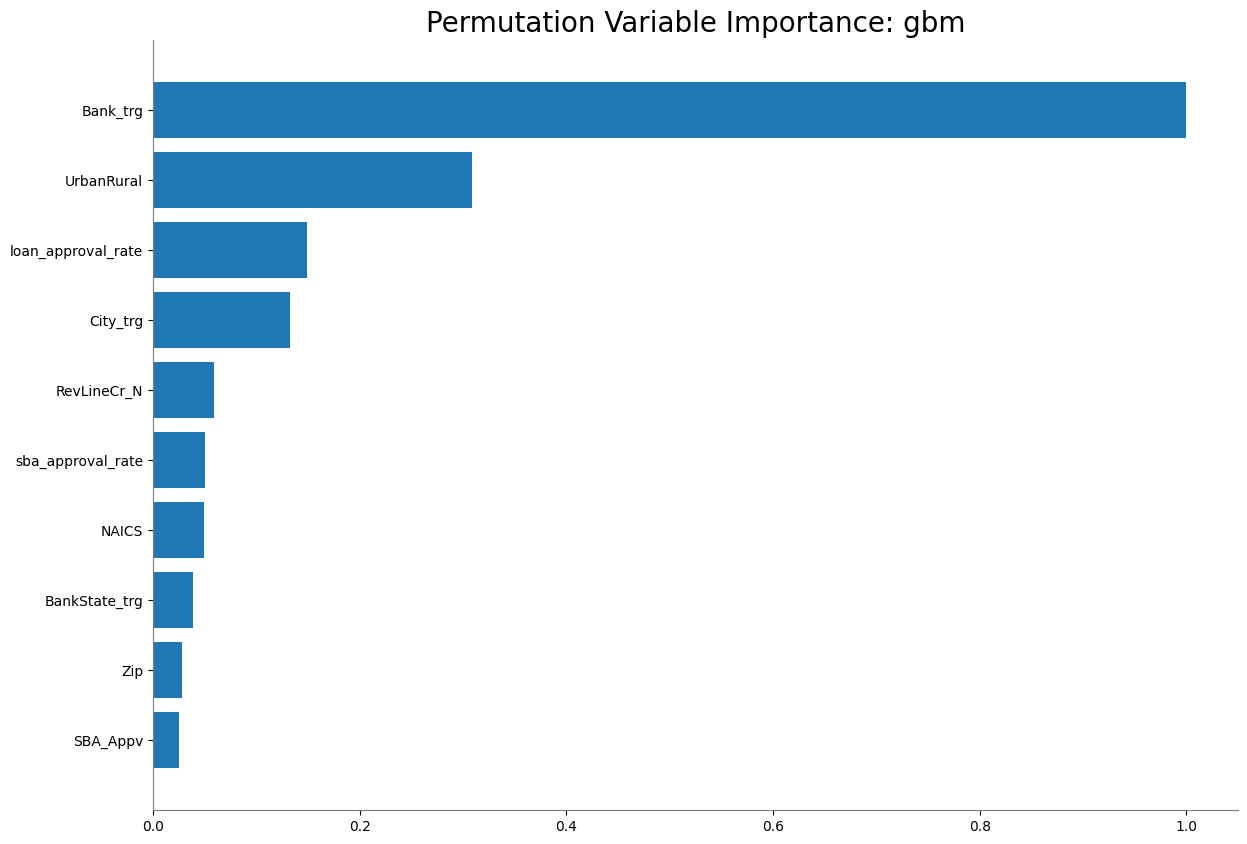

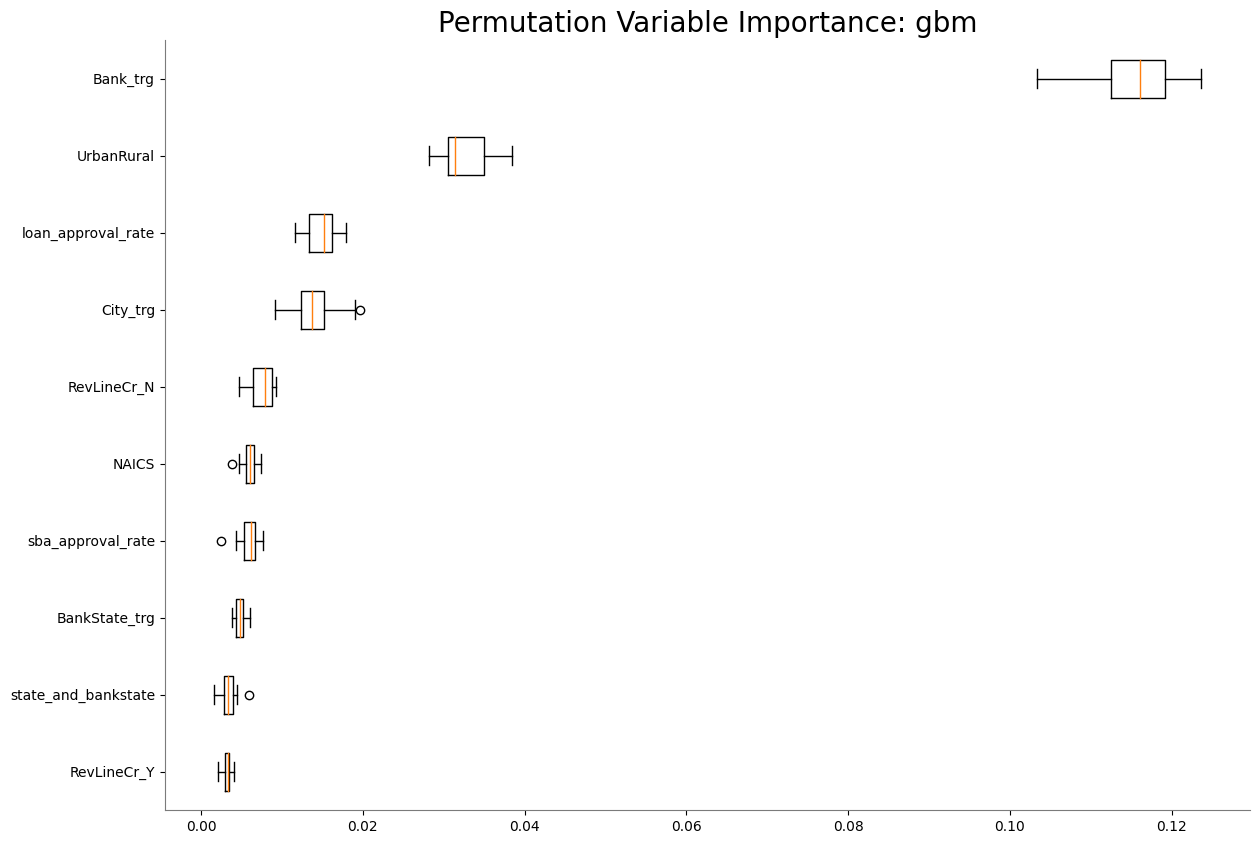

Variable Importances
Variable                   Run 1                   Run 2                   Run 3                   Run 4                   Run 5                   Run 6                   Run 7                   Run 8                   Run 9                   Run 10                  Run 11                  Run 12                  Run 13                  Run 14                  Run 15
-------------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------
Bank_trg                   0.12356137764342479     0.11965430921395626     0.11621523157114244     0.11610633069170895     0.10449223702240518     0.11866205674411578     0.11434883132097373     0.12080603582746341     0.11323949973115854     0.1133895699758497      0.11172911750668912     0.10330496486201879     0.11776401806263637     0.12254695909046787     0.11159012426320447
UrbanRural                 0.03559684013509423     0.028187721511457764    0.03132280957294986     0.038428658437263175    0.02941600789897514     0.031337556450276915    0.030744680980494543    0.029339379833505763    0.034359953117399145    0.030405771457655106    0.03359906743626462     0.03665264979392402     0.031408662415039146    0.036217348036541974    0.032834047928500754
loan_approval_rate         0.012706042255172245    0.015734276782048084    0.012841245449916161    0.013661907493572989    0.011600907861470722    0.013075896862152825    0.01662776995442561     0.01528533761336337     0.017650650054163775    0.015193184651802971    0.014411568579519862    0.017875696819610765    0.017755966790121813    0.015074274715976221    0.015522032530475127
City_trg                   0.012018271666493385    0.014562590299469047    0.013179080828483514    0.01905450386328711     0.019652049711910258    0.015487963276408778    0.01076764590221202     0.013694146155909137    0.012665685452834197    0.01152351315623168     0.009177471468505227    0.014844987645324381    0.0133639877099343      0.014633321987421066    0.015517121023978842
NAICS                      0.007168209507111056    0.00573269832294554     0.006054449523491212    0.006118653550612141    0.006058737373449752    0.006975038767258468    0.005629907065606621    0.0067303403225895675   0.005469737345580428    0.004746320251681424    0.003815429539721249    0.005346010479661989    0.007438429762372523    0.006091011987024553    0.006393980290437917
RevLineCr_N                0.006174044619374874    0.0070334159379858985   0.006364103067174942    0.009261336676085863    0.008563810501612479    0.009331485202818124    0.00527434145842931     0.004677348953800897    0.008230071843468134    0.007911672376866297    0.008144434300652037    0.007757751235055843    0.006437147843658342    0.009002127016804251    0.009207576845221666
BankState_trg              0.004792621827161225    0.0038611458788821995   0.005294545237737758    0.005308850503891516    0.004365649491927859    0.004332456218273495    0.00512019881663317     0.005044428572210546    0.004285199269159268    0.004714108576913345    0.004417172609099795    0.005043934136931272    0.004154608777951263    0.005576242479915616    0.006055399842608833
RevLineCr_Y                0.003559924781369017    0.0027778956928398157   0.0034675096027956265   0.0032602460322519455   0.0038289473791256468   0.003415126713515515    0.0020893577162366395   0.0032853813988364955   0.0034911483541397725   0.0028337050940901998   0.003181026784600749    0.0021091842731537636   0.003045656801575536    0.003936313890814058    0.004036805506014818
SBA_Appv                   0.0034359981244871385   0.00425672229189511     0.003821706391036961    0.0027957309084213344   0.003126316077782465    0.002

In [48]:
dill.dump(best_gbm, open('best_gbm.pkl', 'wb'))
#Global feature importance using permutation feature importance
# calculate importance
permutation_varimp = best_gbm.permutation_importance(h2o_test, use_pandas=True)

# plot permutation importance (bar plot)
gbm_model.permutation_importance_plot(h2o_test)

# plot permutation importance (box plot)
gbm_model.permutation_importance_plot(h2o_test, n_repeats=15)

In [47]:
def examine_all_reason_codes(data, model):

    shap_contribs = model.predict_contributions(data)

    col_mapping = {}
    for i in data.col_names:
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols

    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)

    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    X = data.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)

    return shap.summary_plot(shap_contribs[shap_cols].values,
                             X[shap_cols].values,
                             feature_names=shap_cols
                             )

# Evaluating shapley values 

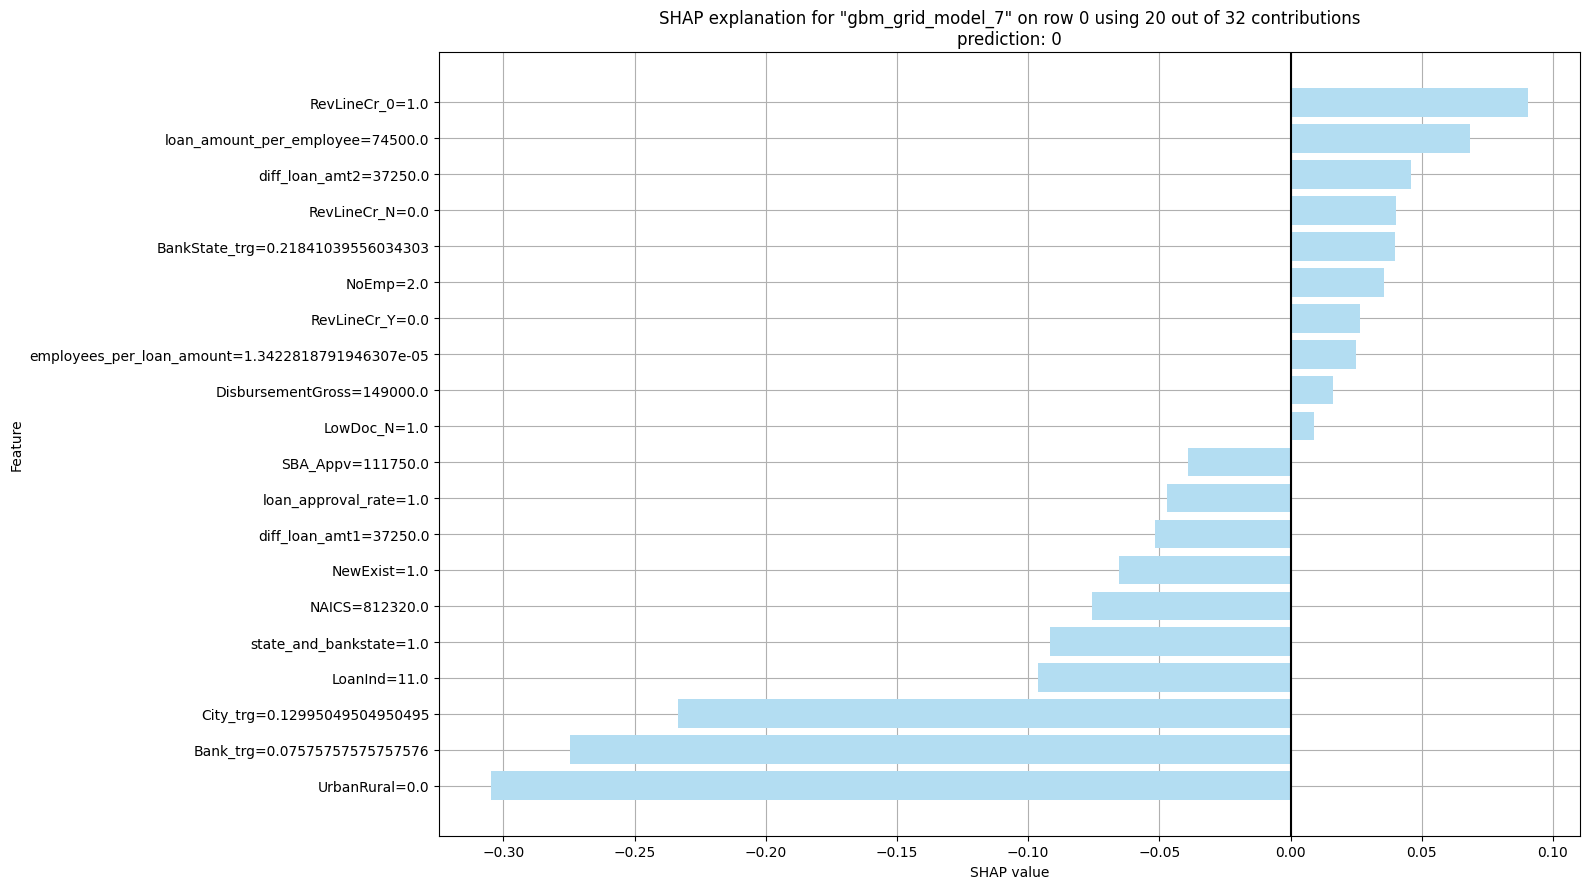

In [49]:

#Bank is the most important variable explaining the target variable,followed by City and UrbanRural
#Individual observations analysis using Shapley values
# Using H2O-3 plotting
best_gbm.shap_explain_row_plot(h2o_test, row_index=0)
#Bank and UrbanRural are negatively effecting our Prediction
#RevLineCr is positively effecting our prediction

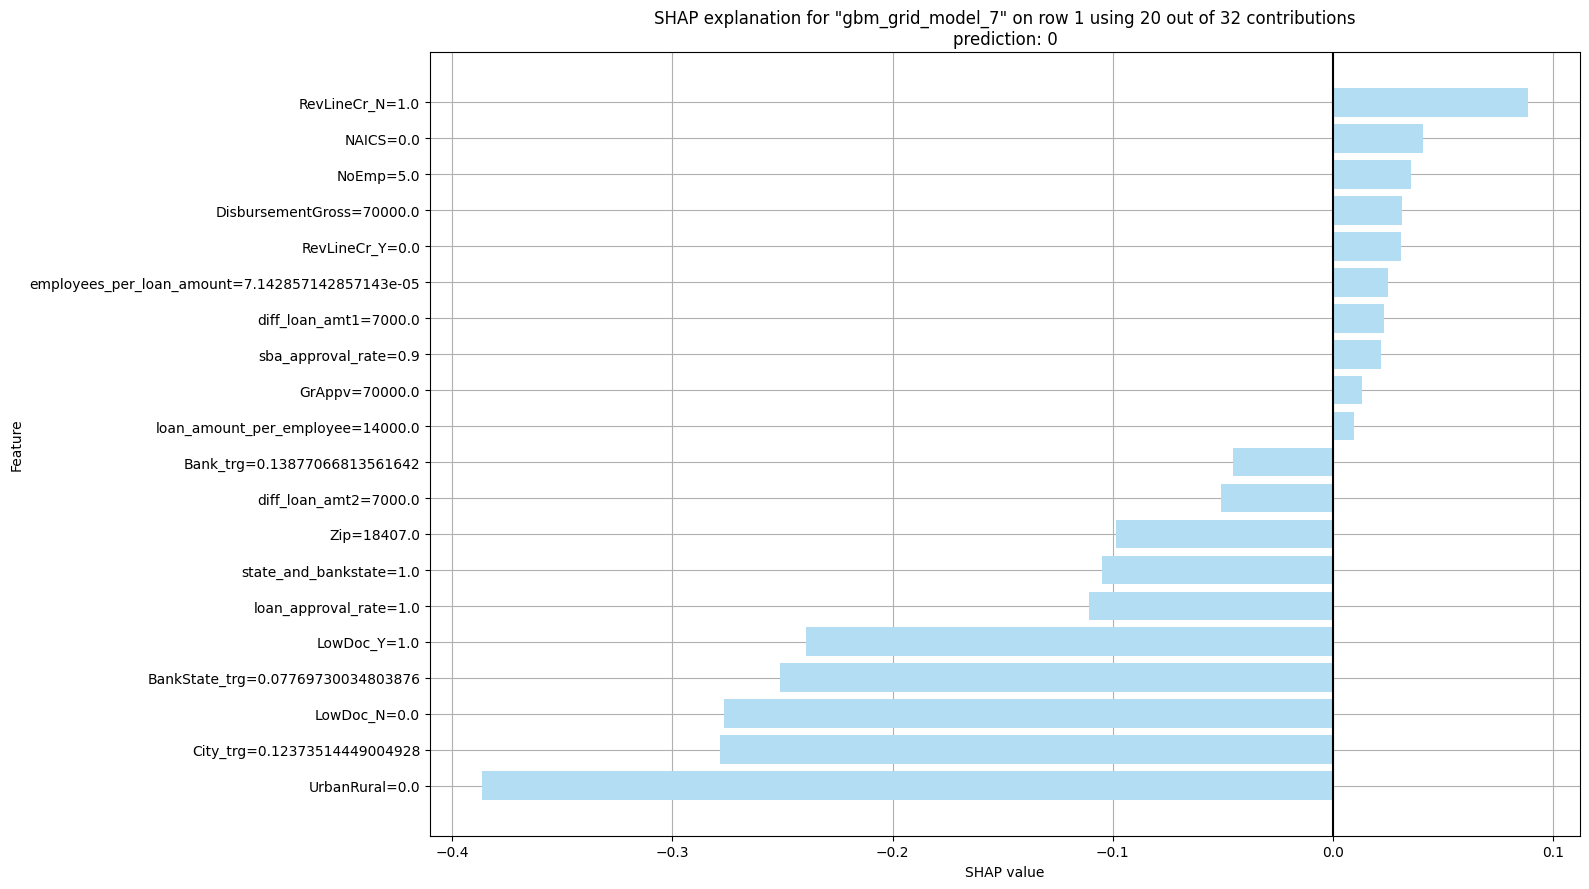

In [50]:
best_gbm.shap_explain_row_plot(h2o_test, row_index=1)
#UrbanRural and City are negatively effecting our Prediction here.

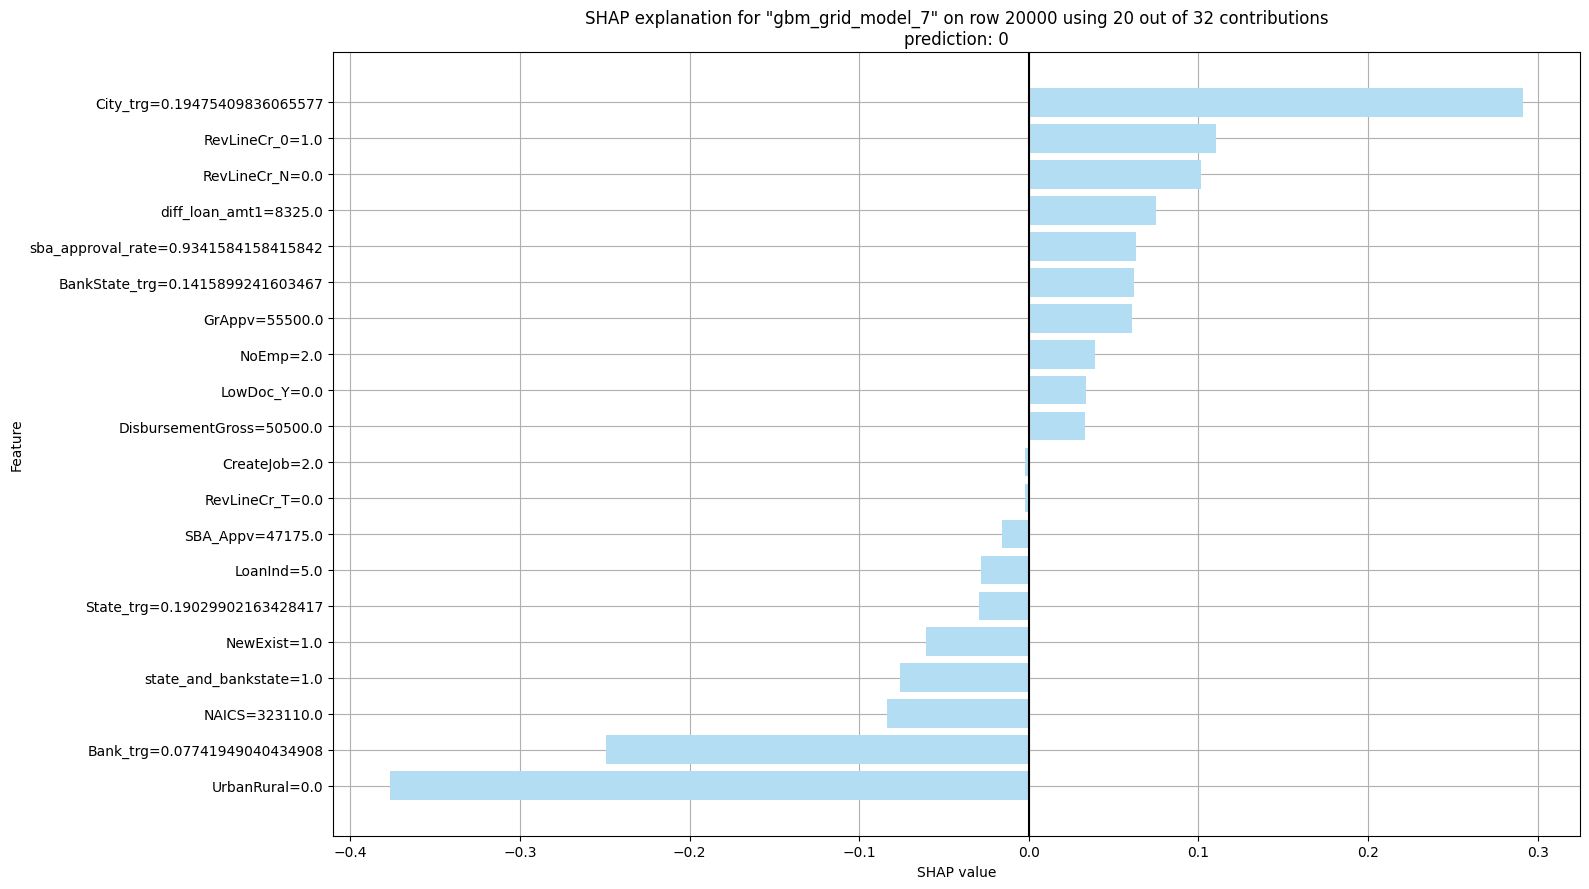

In [51]:
best_gbm.shap_explain_row_plot(h2o_test, row_index=20000)
##Bank is positively effecting our Prediction here.
#City is negatively effecting our Prediction here.

In [52]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

# Make predictions on the test data
y_pred = best_lgb.predict(X_test)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Print the F1 score and accuracy
print("F1 score:", f1)
print("Accuracy:", accuracy)

F1 score: 0.5136759475039864
Accuracy: 0.7621


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

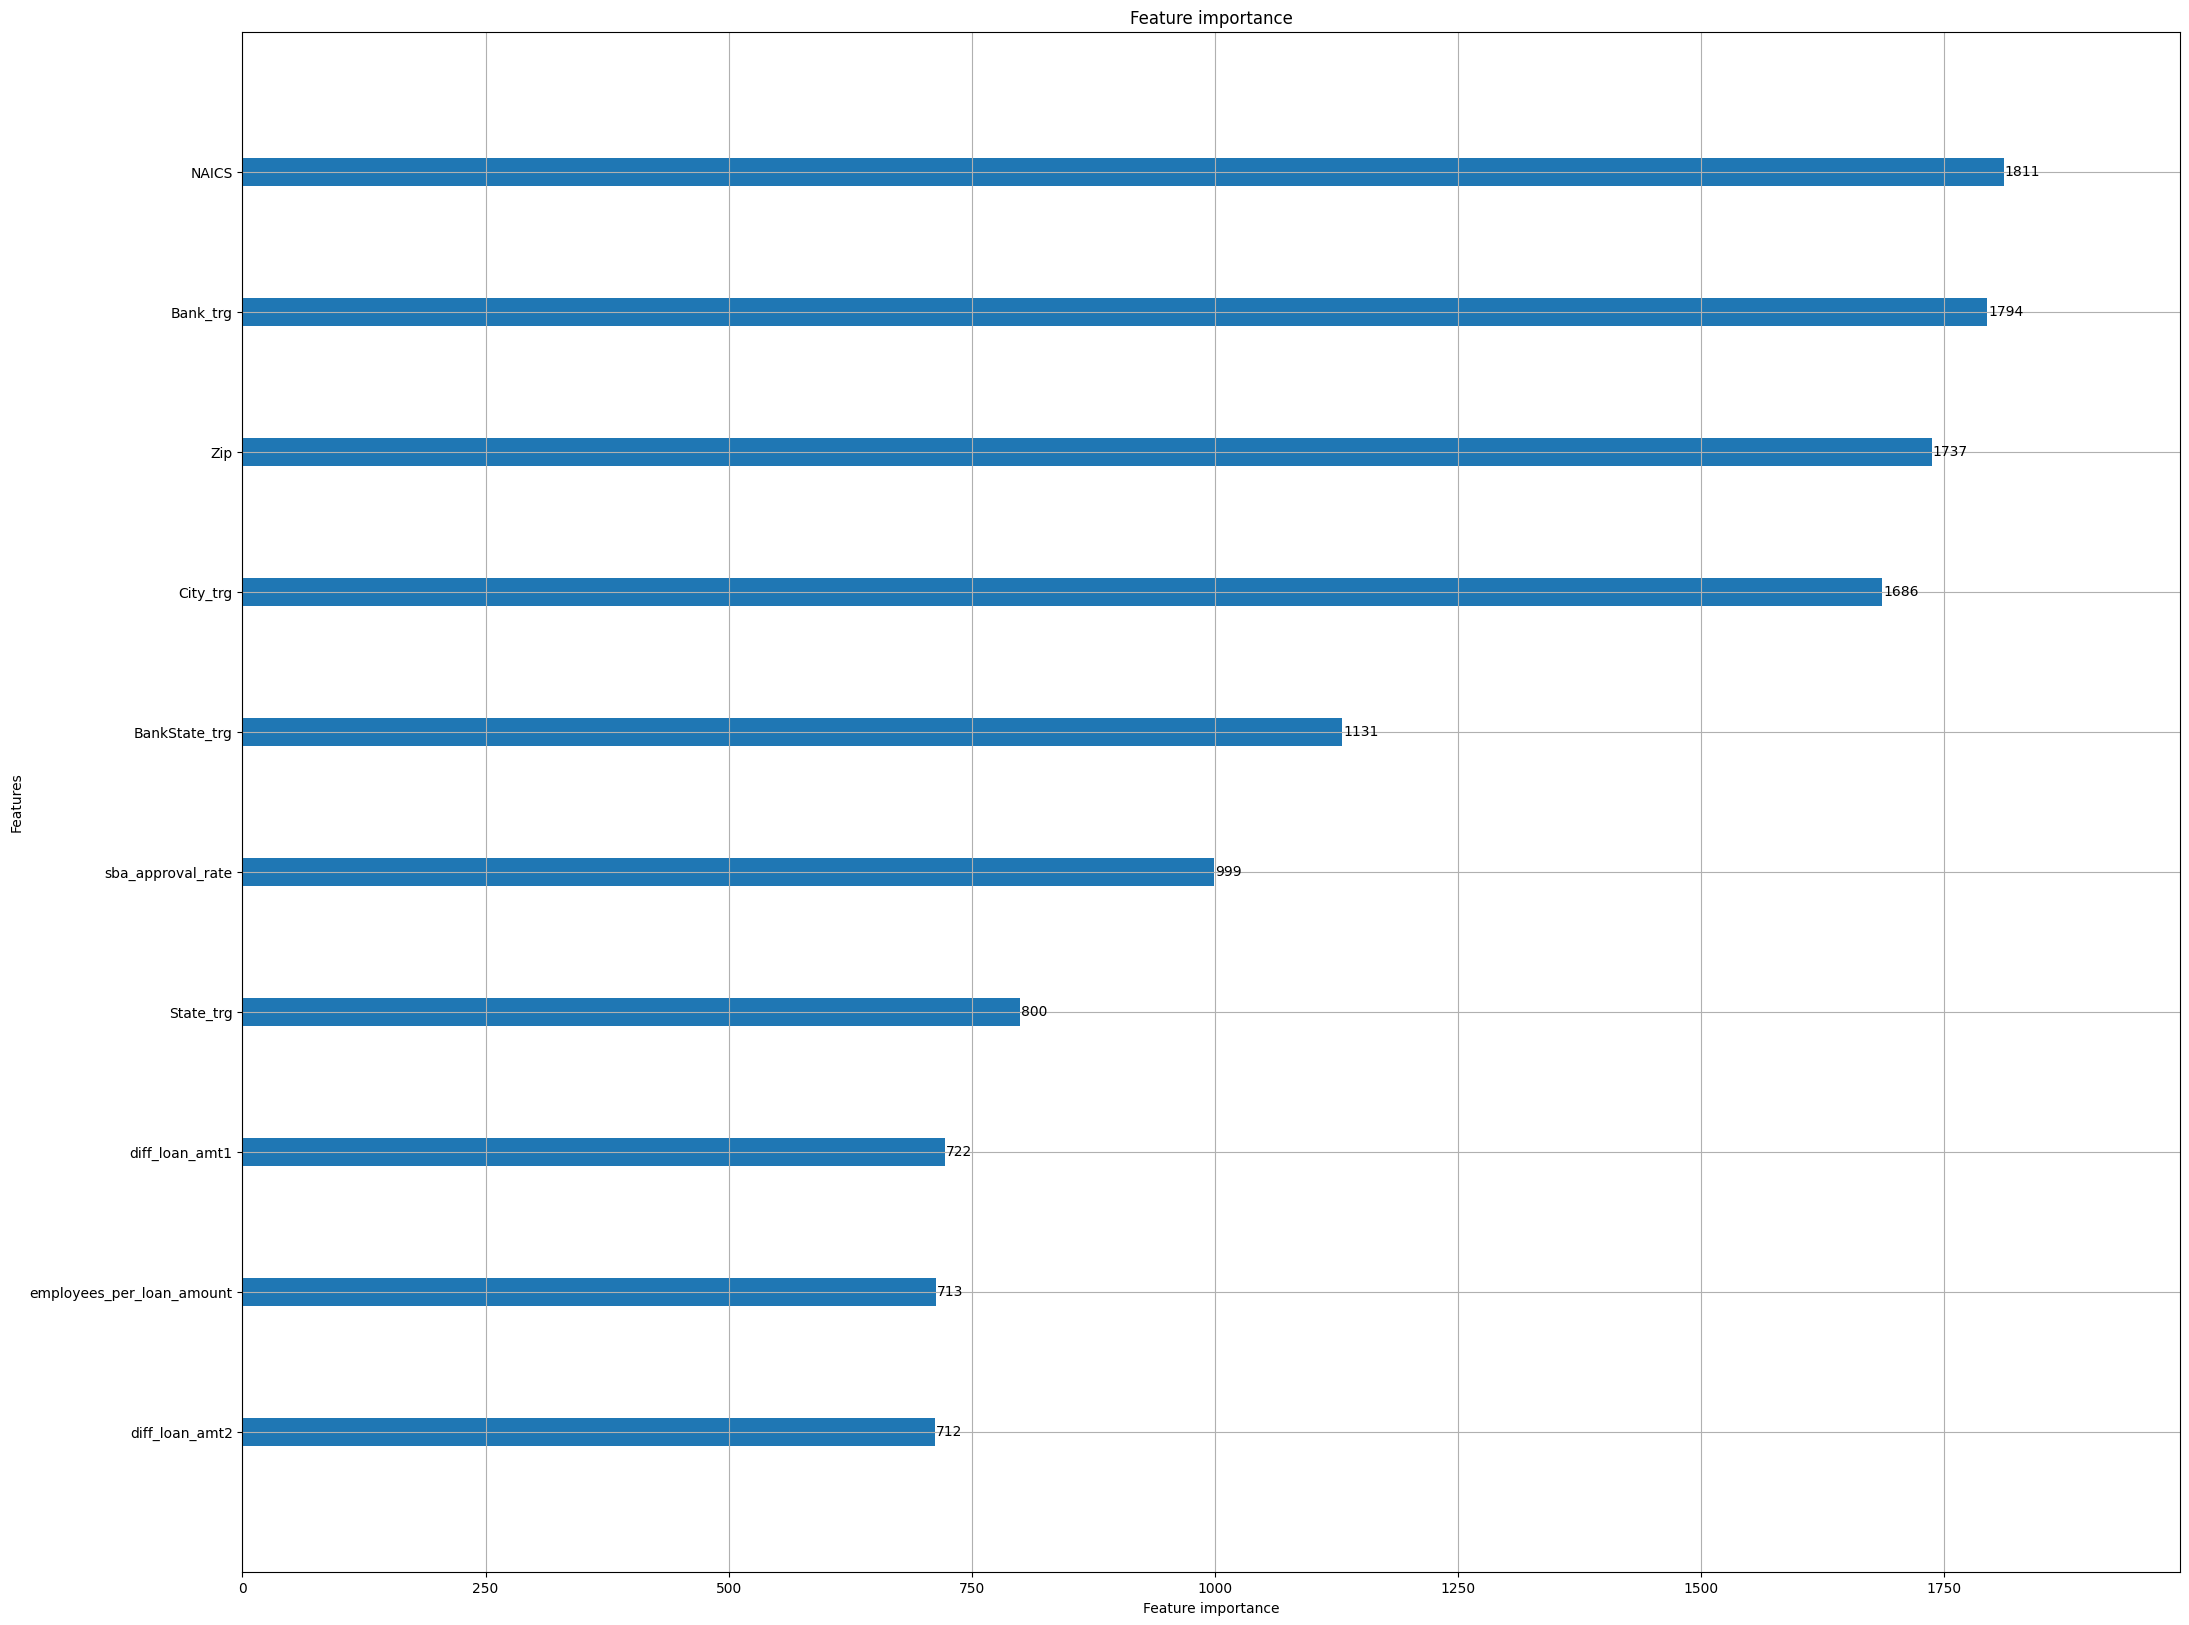

In [53]:
lgb.plot_importance(best_lgb,figsize=(25,20),max_num_features = 10)

In [54]:
#feature importance
shap_values = shap.TreeExplainer(best_lgb).shap_values(X_test)

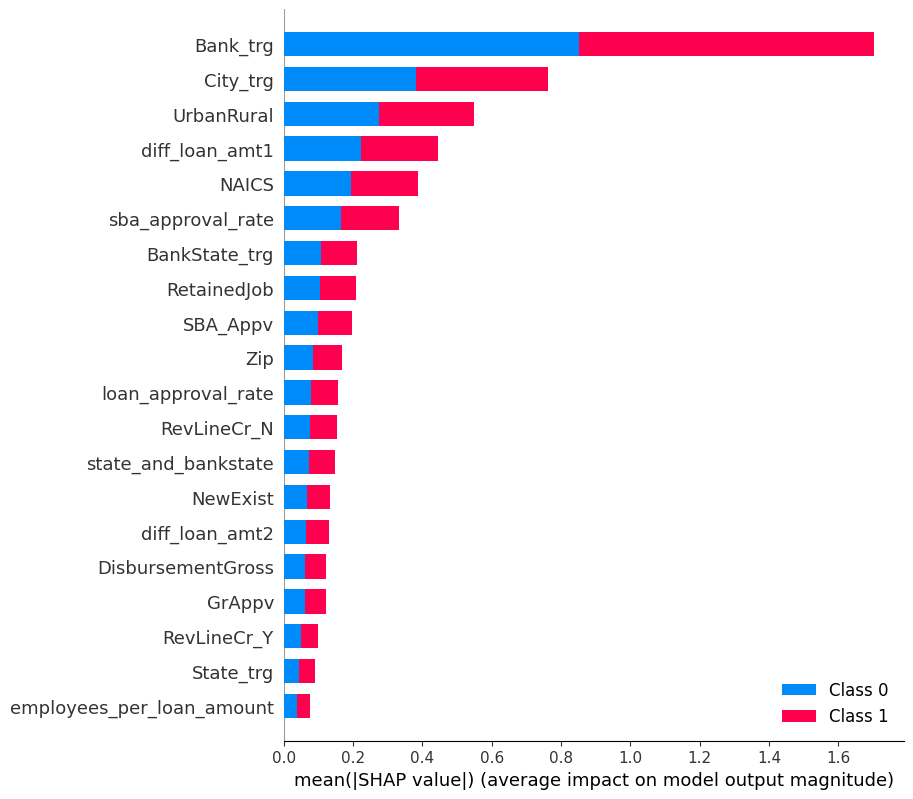

In [55]:
shap.summary_plot(shap_values, X_test)

# SCORING FUNCTION

In [55]:
#Model- lightgbm

In [56]:
scoring_columns= X_train

In [106]:
# artifacts saving
artifacts_dict = {
    "col_remove_dollar": columns,
    "cat_encoders": cat_encoders,
    "model": best_lgb,
    "best_parameter": best_params,
    "threshold": best_threshold,
    "scoring_columns": scoring_columns
}

import pickle
artifacts_dict_file = open("artifacts_dictnew_file.pkl", "wb")
pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)
artifacts_dict_file.close()


In [102]:
from copy import deepcopy
from sklearn.linear_model import LogisticRegression
import category_encoders as ce    
import pickle
import numpy as np

def project2_scoring_func(data):
    
    X = data.copy()
    
    '''Load Artifacts'''
    
    artifacts_dict_file = open("artifacts_dictnew_file.pkl", "rb")
    artifacts_dict = pickle.load(file=artifacts_dict_file)
    artifacts_dict_file.close()

    col_remove_dollar = artifacts_dict["col_remove_dollar"]
    cat_encoders = artifacts_dict["cat_encoders"]
    model = artifacts_dict["model"]  
    scoring_columns = artifacts_dict["scoring_columns"]
    threshold = artifacts_dict['threshold']
   
    values_to_fill = {}
    for col in X.columns:
        if X[col].isna().any() == True:
            if pd.api.types.is_numeric_dtype(X[col].dtype):
                values_to_fill[col] = 0
            else:
                values_to_fill[col] = "Missing"
    X.fillna(value=values_to_fill,inplace=True)
   
    
    # Convert specific columns to string type
    for col in col_remove_dollar:
        X[col] = X[col].astype(str)
    
    # Remove Dollars from numerical vars
    for col in col_remove_dollar:
        X[col] = X[col].str.replace('$','',regex=True).replace(',','',regex=True)
        X[col] = X[col].astype(float)
    
    import numpy as np

    # whether the bank and customer are in the same state
    X['state_and_bankstate'] = np.where(X['State'] == 'BankState', 1, 0)

    
    # The difference between initial approved amount and final amount of loan
    X['diff_loan_amt1'] = X['GrAppv'] - X['SBA_Appv']
    
    # The difference between approved amount of loan and the requested amount of loan
    X['diff_loan_amt2'] = X['DisbursementGross'] - X['SBA_Appv']
    
    # amount of installment
    X['total_job'] = X['CreateJob'] * X['RetainedJob']
    
    #The ratio of the gross amount of loan approved by the bank (GrAppv) to the requested amount of loan (DisbursementGross).
    X['loan_approval_rate'] = X['GrAppv'] / X['DisbursementGross']
    
    #The ratio of the number of business employees (NoEmp) to the gross amount of the loan approved by the bank (GrAppv).
    X['employees_per_loan_amount'] = X['NoEmp'] / X['GrAppv']
    
    #The ratio of the loan amount approved by the SBA (SBA_Appv) to the requested amount of loan (DisbursementGross).
    X['sba_approval_rate'] = X['SBA_Appv'] / X['DisbursementGross']
    
    #indicates whether the business is a franchise or not based on the FranchiseCode column
    X['franchise_or_not'] = np.where(X['FranchiseCode'] <= 1, 0, 1)
    
    # the ratio of the gross amount of the loan approved by the bank (GrAppv) to the number of business employees (NoEmp)
    X['loan_amount_per_employee'] = X['GrAppv'] / X['NoEmp']
    
    #the ratio of the outstanding balance (BalanceGross) to the gross amount of the loan approved by the bank (GrAppv).
    X['loan_balance_ratio'] = X['BalanceGross'] / X['GrAppv']

  
    # -- Drop NewExist = 0
    index_exist0 = []
    for item in list(X[X['NewExist'] == 0].index):
        index_exist0.append(item)

    X.drop(index_exist0, inplace=True)

        # -- Change newExist
    def change_newexist(x):
        if x == 1:
            return 1
        else:
            return 0
    X['NewExist'] = X['NewExist'].apply(lambda x : change_newexist(x))
    # -- change franchise

    def change_franchise(x):
        if (x == 1) | (x == 0):
            return 0
        else :
            return 1

    X['FranchiseCode'] = X['FranchiseCode'].apply(lambda x: change_franchise(x))
    #dropping values other than Y or N for LowDoc
    index_drop_lowdoc = []
    for index in list(X[(X['LowDoc'] != 'N') & (X['LowDoc'] != 'Y')].index):
        index_drop_lowdoc.append(index)

    X.drop(index_drop_lowdoc,inplace=True)
    
    #dropping values other than Y, N ,0,T
    index_drop_RevLineCr = []
    for index in list(X[(X['RevLineCr'] != 'N') & (X['RevLineCr'] != 'Y') & (X['RevLineCr'] != '0') & (X['RevLineCr'] != 'T')].index):
        index_drop_RevLineCr.append(index)

    X.drop(index_drop_RevLineCr, inplace=True)


  
    from sklearn.preprocessing import OneHotEncoder
    from category_encoders import TargetEncoder
    from copy import deepcopy

    '''Save original columns that need to be droped or not used
      Save One-hot and Label encoders for future use
    '''
       # Categorical encoding
    # Columns to drop from ML models
    cols_to_drop = ["City", "State", "Bank", "BankState", "RevLineCr"]
    # Categorical encoders dictionary
    cat_encoders = {}
    # New categorical (encoded) columns
    cat_enc_columns = []

    for col, (encoder, enc_type) in cat_encoders.items():
        if col not in ["City", "State", "Bank", "BankState", "RevLineCr"]:
            if enc_type == "ohe":
                ohe = encoder
                result = ohe.transform(X[[col]])
                ohe_columns = [col + "_" + str(x) for x in ohe.categories_[0]]
                cat_enc_columns = cat_enc_columns + ohe_columns
                new_encoded = pd.DataFrame(result, columns=ohe_columns, index=X.index)
            elif enc_type == "trg":
                trg = encoder
                new_col_name = col + "_trg"
                result = trg.transform(X[[col]])
                new_encoded = pd.DataFrame(result, columns=[new_col_name], index=X.index)
        X=pd.concat([X, new_encoded.reindex(X.index)], axis=1, join="inner")

    X.drop(cols_to_drop, axis=1, inplace=True)
    
    
      
    # light gbm predict
    scoring_columns=artifacts_dict['scoring_columns']
    X_test=scoring_columns
    model=artifacts_dict['model']
    y_pred_proba = model.predict(X_test)
    y_pred_binary = np.round(y_pred_proba)
    y_pred_binary=y_pred_binary.astype(int)
    
    
    df = {"label":y_pred,
         "probability_0":y_pred_binary[0],
         "probability_1":y_pred_binary[1]}
    
    return pd.DataFrame(df)
    
    

In [103]:



import pandas as pd

# Read in the CSV file into a DataFrame
df = pd.read_csv('E:\machine_learning\data\SBA_loans_project_2.zip')

# Drop the 'MIS_Status' and 'index' columns from the DataFrame
df = df.drop(columns=['MIS_Status', 'index'])

# Sample 10,000 random rows from the DataFrame to create a new DataFrame 'test_data'
test_data = df.sample(n=10000, random_state=234)

# Reset the index of the 'test_data' DataFrame
test_data = test_data.reset_index(drop=True)


print(test_data)

                                City State    Zip  \
0                      IRON MOUNTAIN    MI  49801   
1                     CORONA DEL MAR    CA  92625   
2                          ENGLEWOOD    NJ   7631   
3                        LOS ANGELES    CA  90032   
4                          Annapolis    MD  21409   
...                              ...   ...    ...   
9995                    Indianapolis    IN  46227   
9996  BOISE (CORPORATE NAME BOISE CI    ID  83705   
9997                    GRAND RAPIDS    MI  49512   
9998                        BRILLION    WI  54110   
9999                   WILLIAMSVILLE    NY  14221   

                               Bank BankState   NAICS  NoEmp  NewExist  \
0       WELLS FARGO BANK NATL ASSOC        SD       0      1       2.0   
1         CDC SMALL BUS. FINAN CORP        CA       0     16       1.0   
2            CAPITAL ONE NATL ASSOC        VA  561990      7       1.0   
3                         BBCN BANK        CA  442299      2       

In [104]:
#The below code was used for testing the above scoring function
project2_scoring_func(test_data)

label  probability_0  probability_1
0      0.125962              1              0
1      0.091921              1              0
2      0.925360              1              0
3      0.572052              1              0
4      0.158108              1              0
...         ...            ...            ...
49995  0.125400              1              0
49996  0.067213              1              0
49997  0.313762              1              0
49998  0.931072              1              0
49999  0.378438              1              0

[50000 rows x 3 columns]